# Bar Race Chart : préparation des données

In [1]:
def sepMillier(n:int) ->str:
    """ Séparateur de milliers """
    num = str(n)
    sepnum = ""
    while num != "":
        first = num[:-3]
        last = num[-3:]
        sepnum = " "+last+sepnum
        num = first
    return sepnum[1:]

### Données sources et paramètres d'affichage :

In [2]:
# nom des fichiers sources 
sourcePath = "dataset_brut/"
sourceCSVFile = "owid-co2-data-2023.csv"
sourcesCountries = "world_countries.csv"

# dernière année de données
yearEnd = 2023

# Fichier dataset de sortie:
dataset_path = "staticfolder/dataset.js"

# données intéressantes, à renommer (pour plus de compacité dans l'affichage) :
nameChangeTable = {'iso_code':'code', 'population':'pop', 'co2':'co2', 'cumulative_co2':'bCco2', 'co2_per_capita':'co2_pc'}
# unités :
data_unit = {
    "pop":{
        "name": {"en":"Population", "fr":"Population"}, 
        "unit": {"en":"people (% of world total)", "fr":"personnes (% du total mondial)"}
    }, 
    "co2":{
        "name": {"en":"Annual CO<sub>2</sub> emissions", "fr":"Emissions annuelles de CO<sub>2</sub>"}, 
        "unit": {"en":"million tonnes of CO<sub>2</sub> (% of world total)", "fr":"million de tonnes de CO<sub>2</sub> (% du total mondial)"}
    }, 
    "bCco2":{     # brut (avec pbs sur données incomplètes, incohérences,...)
        "name": {"en":"Cumulative CO<sub>2</sub> emissions", "fr":"Emissions cumulées brutes de CO<sub>2</sub>"}, 
        "unit": {"en":"million tonnes of CO<sub>2</sub> (% of world total)", "fr":"million de tonnes de CO<sub>2</sub> (% du total mondial)"}
    },  
    "rCco2":{     # recalculé bCco2 recalculé, cohérent
        "name": {"en":"Cumulative CO<sub>2</sub> emissions", "fr":"Emissions cumulées de CO<sub>2</sub>"}, 
        "unit": {"en":"million tonnes of CO<sub>2</sub> (% of world total)", "fr":"million de tonnes de CO<sub>2</sub> (% du total mondial)"}
    },
    "co2_pc":{
        "name": {"en":"Annual CO<sub>2</sub> emissions per person", "fr":"Emissions annuelles de CO<sub>2</sub> par personne"}, 
        "unit": {"en":"tonnes of CO<sub>2</sub> per person (% change over previous year)", "fr":"tonne de CO<sub>2</sub> par personne (% évolution / année précédente)"}
    }, 
    "Cco2_pc":{
        "name": {"en":"Cumulative CO<sub>2</sub> emissions per person", "fr":"Emissions cumulées de CO<sub>2</sub> par personne"}, 
        "unit": {"en":"tonnes of CO<sub>2</sub> per person", "fr":"tonne de CO<sub>2</sub> par personne"}
    }, 
}

# nombre maximum de barres :
N = 20

#population en dessous de laquelle un pays n'est pas pris en compte
popmin = 200000 

# explication sous le graphique :
graph_legend = {
    "pop":{
        "en":"Global population per country. Sources:", 
        "fr":"Population mondiale par pays. Sources:", 
    },
    "co2":{
        "en":f"Annual territorial CO<sub>2</sub> emissions, per country with a population greater than {sepMillier(popmin)} in {yearEnd}, land-use change not included. Sources:", 
        "fr":f"Emissions territoriales annuelles de CO<sub>2</sub>, par pays dont la population est supérieure à {sepMillier(popmin)} en {yearEnd}, changement d'affectation des terres non inclus. Sources:", 
    }, 
    "bCco2":{     # brut (avec pbs sur données incomplètes, incohérences,...)
        "en":f"Cumulative territorial CO<sub>2</sub> emissions, per country with a population greater than {sepMillier(popmin)} in {yearEnd}, land-use change not included. Sources:", 
        "fr":f"Emissions territoriales cumulées de CO<sub>2</sub>, par pays dont la population est supérieure à {sepMillier(popmin)} en {yearEnd}, changement d'affectation des terres non inclus. Sources:", 
    }, 
    "rCco2":{     # recalculé bCco2 recalculé, cohérent
        "en":f"Cumulative territorial CO<sub>2</sub> emissions, per country with a population greater than {sepMillier(popmin)} in {yearEnd}, land-use change not included. Sources:", 
        "fr":f"Emissions territoriales cumulées de CO<sub>2</sub>, par pays dont la population est supérieure à {sepMillier(popmin)} en {yearEnd}, changement d'affectation des terres non inclus. Sources:", 
    }, 
    "co2_pc":{
        "en":f"Annual territorial CO<sub>2</sub> emissions per person, per country with a population greater than {sepMillier(popmin)} in {yearEnd}, land-use change not included. Sources:", 
        "fr":f"Emissions territoriales annuelles de CO<sub>2</sub> par personne, par pays dont la population est supérieure à {popmin} en {yearEnd}, changement d'affectation des terres non inclus. Sources:", 
    }, 
    "Cco2_pc":{
        "en":f"Cumulative territorial CO<sub>2</sub> emissions per person, per country with a population greater than {sepMillier(popmin)} in {yearEnd}, land-use change not included. Sources:", 
        "fr":f"Emissions territoriales cumulées de CO<sub>2</sub> par personne, par pays dont la population est supérieure à {sepMillier(popmin)} en {yearEnd}, changement d'affectation des terres non inclus. Sources:", 
    }, 
}

owid_citation = {
"pop": 'Edouard Mathieu and Lucas Rodés-Guirao (2022) - “What are the sources for Our World in Data\'s population estimates?” Published online at OurWorldInData.org. Retrieved from: "https://ourworldindata.org/population-sources" [Online Resource]',
"co2": 'Hannah Ritchie, Pablo Rosado and Max Roser (2023) - “CO₂ and Greenhouse Gas Emissions” Published online at OurWorldInData.org. Retrieved from: "https://ourworldindata.org/co2-and-greenhouse-gas-emissions" [Online Resource]'
}

underlying_citation = {
    "pop": 'Klein Goldewijk, K., A. Beusen, J.Doelman and E. Stehfest (2017), Anthropogenic land use estimates for the Holocene; HYDE 3.2, Earth System Science Data, 9, 927-953. '+ 'Gapminder population dataset version 7, based on data by Angus Maddison improved by Clio Infra. https://www.gapminder.org/data/documentation/gd003/'+' United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition. Rev. 1.',
    "co2": 'Global Carbon Budget (2023) – with major processing by Our World in Data',
    "co2_pc": 'Global Carbon Budget (2023); Population based on various sources (2023) – with major processing by Our World in Data'
    }
       
full_underlying_citation = { 
    "co2": 'Global Carbon Budget (2023) – with major processing by Our World in Data. “Annual CO₂ emissions – GCB” [dataset]. Global Carbon Project, “Global Carbon Budget” [original data].',
    "co2_pc": 'Global Carbon Budget (2023); Population based on various sources (2023) – with major processing by Our World in Data. “Annual CO₂ emissions (per capita) – GCB” [dataset]. Global Carbon Project, “Global Carbon Budget”; Various sources, “Population” [original data].'
}
    
    
    
 



### Imports et construction du dataframe source :

In [3]:
import numpy as np
import pandas as pd
import pycountry_convert as pc
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import copy # pour utiliser deepcopy afin de copier les dictionnaires

# construire dataframes :
dataSource = pd.read_csv(sourcePath + sourceCSVFile)

WorldCountries = pd.read_csv(sourcePath + sourcesCountries).set_index("alpha3")
print(WorldCountries.shape)
dataSource

(232, 10)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [4]:
# draft à effacer
WorldCountries[WorldCountries["continentCode"] == "no_name"].index

Index([], dtype='object', name='alpha3')

In [5]:
l0 = list(dataSource[~dataSource["iso_code"].isna()]["iso_code"].unique())
print("Nombre d'iso_codes alpha3, non 'NaN': ", len(l0))
print(", ".join(l0))
print("=====================================================")
l1 = list(dataSource[dataSource["iso_code"].isna()]["country"].unique())
print("Nombre de pays dont l'iso_code est 'NaN' : ", len(l1))
print(", ".join(l1))
dataSource[dataSource["iso_code"] == "ANT"]["country"].unique()

Nombre d'iso_codes alpha3, non 'NaN':  218
AFG, ALB, DZA, AND, AGO, AIA, ATA, ATG, ARG, ARM, ABW, AUS, AUT, AZE, BHS, BHR, BGD, BRB, BLR, BEL, BLZ, BEN, BMU, BTN, BOL, BES, BIH, BWA, BRA, VGB, BRN, BGR, BFA, BDI, KHM, CMR, CAN, CPV, CAF, TCD, CHL, CHN, CXR, COL, COM, COG, COK, CRI, CIV, HRV, CUB, CUW, CYP, CZE, COD, DNK, DJI, DMA, DOM, TLS, ECU, EGY, SLV, GNQ, ERI, EST, SWZ, ETH, FRO, FJI, FIN, FRA, PYF, GAB, GMB, GEO, DEU, GHA, GRC, GRL, GRD, GTM, GIN, GNB, GUY, HTI, HND, HKG, HUN, ISL, IND, IDN, IRN, IRQ, IRL, ISR, ITA, JAM, JPN, JOR, KAZ, KEN, KIR, KWT, KGZ, LAO, LVA, LBN, LSO, LBR, LBY, LIE, LTU, LUX, MAC, MDG, MWI, MYS, MDV, MLI, MLT, MHL, MRT, MUS, MEX, FSM, MDA, MCO, MNG, MNE, MSR, MAR, MOZ, MMR, NAM, NRU, NPL, NLD, NCL, NZL, NIC, NER, NGA, NIU, PRK, MKD, NOR, OMN, PAK, PLW, PSE, PAN, PNG, PRY, PER, PHL, POL, PRT, QAT, ROU, RUS, RWA, SHN, KNA, LCA, SPM, VCT, WSM, SMR, STP, SAU, SEN, SRB, SYC, SLE, SGP, SXM, SVK, SVN, SLB, SOM, ZAF, KOR, SSD, ESP, LKA, SDN, SUR, SWE, CHE, SYR, TW

array([], dtype=object)

### Nettoyage des données : extraction des pays avec iso_code conforme, extraction des continents et dictionnaire donnant la correspondance entre iso_code et pays / continent.
On utilisera l'iso_code pour identifier chaque pays car il n'y a pas de blanc dans les chaines de caractère, qui peuvent donc être utilisées comme id dans le html.

In [6]:
# retrait des pays dont l'iso-code ne correspond pas à un vrai pays :
dataCountries = dataSource[dataSource["iso_code"].isin(WorldCountries.index)]

In [7]:
# list des countries non valides :
l2 = list(dataSource[~dataSource["iso_code"].isin(WorldCountries.index)]["country"].unique())
print("Nombre des pays non valides : : ", len(l2))
print(", ".join(l2))

Nombre des pays non valides : :  40
Africa, Africa (GCP), Asia, Asia (GCP), Asia (excl. China and India), Central America (GCP), Europe, Europe (GCP), Europe (excl. EU-27), Europe (excl. EU-28), European Union (27), European Union (28), High-income countries, International aviation, International shipping, International transport, Kosovo, Kuwaiti Oil Fires, Kuwaiti Oil Fires (GCP), Least developed countries (Jones et al.), Low-income countries, Lower-middle-income countries, Middle East (GCP), Monaco, Non-OECD (GCP), North America, North America (GCP), North America (excl. USA), OECD (GCP), OECD (Jones et al.), Oceania, Oceania (GCP), Ryukyu Islands, Ryukyu Islands (GCP), San Marino, South America, South America (GCP), Upper-middle-income countries, Vatican, World


### Traitement des données, et création du panda et du dataset jason :
##### Eclater le dataframe en dictionnaire de dataframe : {  clé1: dataframef(country x year), clé2: ...}

In [8]:
dataCountries

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [9]:
def transform(data):
    # ne garder que les colonnes pertinentes, (pop, co2, ...) les renommer:
    # df.columns # lister les colonnes
    # df.drop(['gdp', 'ghg_per_capita'], axis=1, inplace=True) # retirer les colonnes (exemple)
    data=data[["year"]+list(nameChangeTable.keys())] # sélectionner les colonnes
    data_rename = data.rename(columns=nameChangeTable) #renommer colonnes
    dataset = {}
    for col in data_rename.columns[2:]:
        print(col)
        df = data_rename[["code", "year", col]]
        df = df.pivot(index="code", columns="year")
        df.columns = df.columns.droplevel(0)
        # remplacement des NaN par 0 pour les calculs :
        df = df.fillna(0)
        dataset[col] = df
    return dataset

# transformation du DataFrame en dictionnaires de DataFrames {"pop": df1, "co2":df2,...} 
# chaque DataFrame df étant structuré : pays en index, année en colonne.
datasetCountriesBrut = transform(dataCountries)
datasetCountriesBrut

pop
co2
bCco2
co2_pc


{'pop': year       1750  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
 code                                                                   ...   
 ABW         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 AFG   2802560.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 AGO         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 AIA         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ALB         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
 WSM         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 YEM         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ZAF         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ZMB         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ZWE    438745.0   0.0   0.0   0.0   0.0   0.

#####  Nettoyage de quelques valeurs aberrantes :

In [10]:
datasetCountries = copy.deepcopy(datasetCountriesBrut)
display("Koweit, 1991, émissions aberrantes :")
display(datasetCountriesBrut["co2"].loc[["KWT"]][range(1980, 2000)])
display(datasetCountriesBrut["co2_pc"].loc[["KWT"]][range(1980, 2000)])
display(datasetCountriesBrut["co2_pc"].loc[["QAT"]][range(1961, 1980)])



'Koweit, 1991, émissions aberrantes :'

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
code,,,,,,,,,,,,,,,,,,,,
KWT,24.616,25.14,21.09,21.541,28.285,29.07,35.23,31.378,32.825,35.772,37.807,492.841,29.648,49.129,57.197,56.128,51.627,56.621,52.812,54.978


year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
code,,,,,,,,,,,,,,,,,,,,
KWT,16.359,15.877,12.686,12.349,15.535,15.347,17.861,15.284,15.377,16.132,22.44,364.688,18.134,29.381,34.365,33.379,29.838,31.673,28.635,28.935


year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
code,,,,,,,,,,,,,,,,,,,
QAT,4.061,4.267,121.712,110.209,98.115,86.872,82.047,77.102,69.55,64.978,69.615,73.543,76.966,59.077,56.693,49.625,44.013,43.499,55.445


In [11]:
# corrections : 
datasetCountries["co2"].at["KWT", 1991] = datasetCountries["co2"].at["KWT", 1990]
datasetCountries["co2_pc"].at["KWT", 1991] = datasetCountries["co2_pc"].at["KWT", 1990]
print("KWT, 1991 pour co2 et co2_pc:")
print(datasetCountriesBrut["co2"].at["KWT", 1991],datasetCountries["co2"].at["KWT", 1991])
print(datasetCountriesBrut["co2_pc"].at["KWT", 1991],datasetCountries["co2_pc"].at["KWT", 1991])

KWT, 1991 pour co2 et co2_pc:
492.841 37.807
364.688 22.44


##### Correction des valeurs nulles intercalées par manque de donnée :

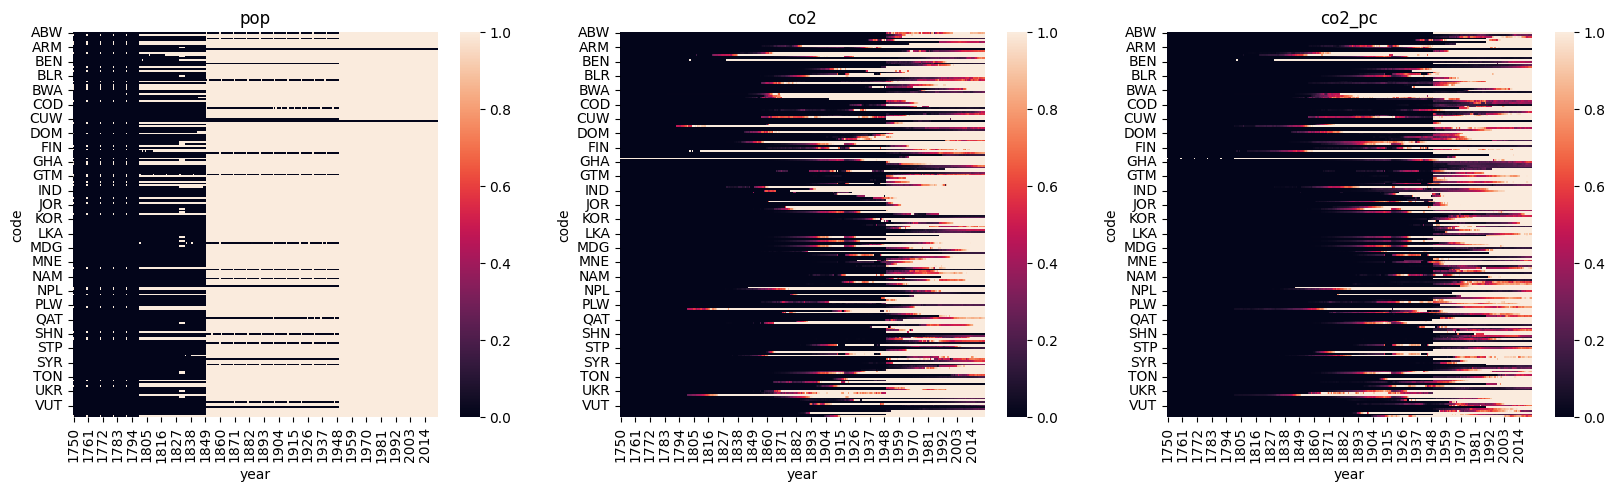

In [12]:
featList = ["pop", "co2", "co2_pc"]
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(20,5))
for i,feat in enumerate(featList):
    sns.heatmap(datasetCountries[feat], vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(feat)
# sns.heatmap(datasetCountries["co2"], vmin=0, vmax=1, ax=axs[1])
# sns.heatmap(datasetCountries["co2_pc"], vmin=0, vmax=1, ax=axs[2])

/tmp/ipykernel_3758/832744890.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()
/tmp/ipykernel_3758/832744890.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()
/tmp/ipykernel_3758/832744890.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()


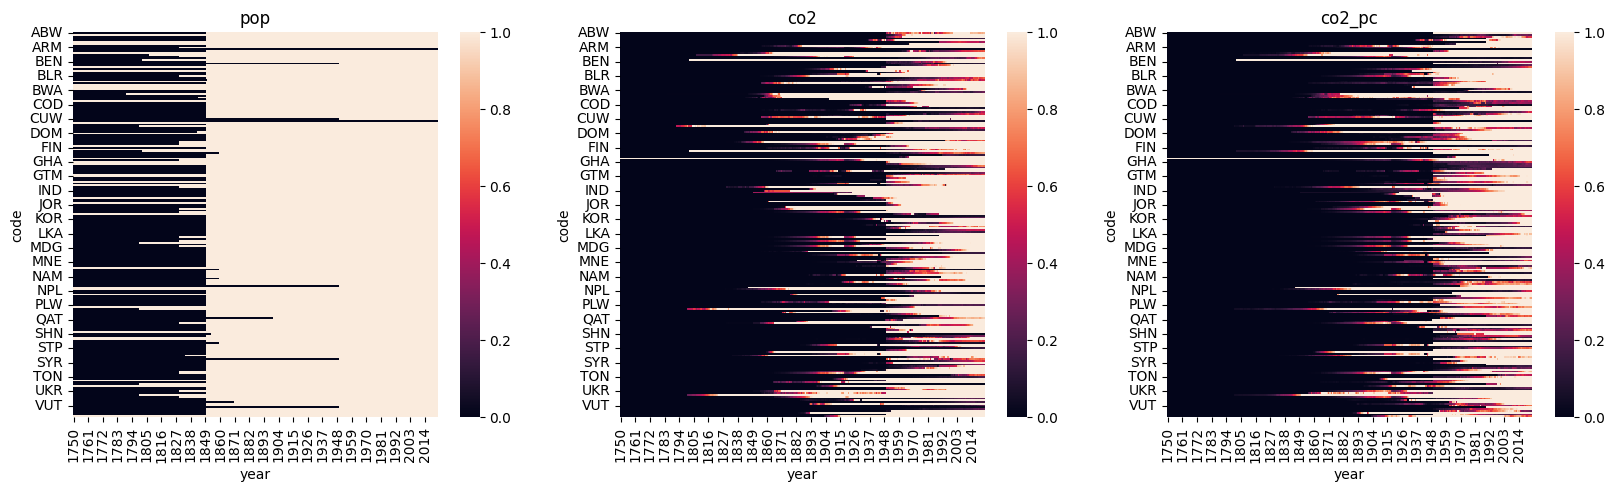

In [13]:
# bouchage des trous : les valeurs nulles sont remplacées par la valeur précédente non nulle.
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(20,5))
for i,feat in enumerate(featList):

    d = datasetCountries[feat]
    for j in d.index:
        d.loc[j] = d.loc[j].replace(0).ffill()
    sns.heatmap(datasetCountries[feat], vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(feat)

In [14]:
datasetCountries.keys()

dict_keys(['pop', 'co2', 'bCco2', 'co2_pc'])

##### Correction de la valeur cumulée de co2 : résolution du problème de calcul lorsque co2 = 0 :

In [15]:
# Problème des données pour Cco2 : la valeur cumulée n'est plus calculée lorsque la valeur est nulle.
# Exemple :
from IPython.display import display, HTML
print("extrait des émissions :")
display(datasetCountries["co2"].loc[["BEL","FRA"]][range(1800, 1815)])
print("extrait des émissions cumulées: le cumul n'est pas calculé si l'émission est nulle !")
display(datasetCountries["bCco2"].loc[["BEL","FRA"]][range(1800, 1815)])

extrait des émissions :


year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814
code,,,,,,,,,,,,,,,
BEL,0.0,0.0,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397,6.397
FRA,0.0,0.0,2.239,2.239,2.176,2.176,2.176,2.176,2.176,2.176,2.121,2.052,2.217,2.048,2.092


extrait des émissions cumulées: le cumul n'est pas calculé si l'émission est nulle !


year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814
code,,,,,,,,,,,,,,,
BEL,0.0,0.0,6.397,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
FRA,0.0,0.0,2.239,0.0,4.415,0.0,0.0,0.0,0.0,0.0,6.537,8.588,10.805,12.853,14.945


In [16]:
# résolution en recalculant les émissions cumulées :
def add_cumulated_emissions(data):
    df = data["co2"].copy()
    for year in range(1751, yearEnd+1):
        df[year] = df[year] + df[year-1]
    data["rCco2"]= df
    return data

datasetCountries = add_cumulated_emissions(datasetCountries)

print("bCco2 (brut): ", datasetCountries["bCco2"].shape, "rCco2 (recalculé): ", datasetCountries["rCco2"].shape)
print("extrait des émissions cumulées recalculées")
display(datasetCountries["rCco2"].loc[["BEL","FRA"]][range(1800, 1815)])
datasetCountries.keys()

bCco2 (brut):  (215, 274) rCco2 (recalculé):  (215, 274)
extrait des émissions cumulées recalculées


year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814
code,,,,,,,,,,,,,,,
BEL,0.0,0.0,6.397,12.794,19.191,25.588,31.985,38.382,44.779,51.176,57.573,63.970,70.367,76.764,83.161
FRA,0.0,0.0,2.239,4.478,6.654,8.830,11.006,13.182,15.358,17.534,19.655,21.707,23.924,25.972,28.064


dict_keys(['pop', 'co2', 'bCco2', 'co2_pc', 'rCco2'])

<Axes: xlabel='year', ylabel='code'>

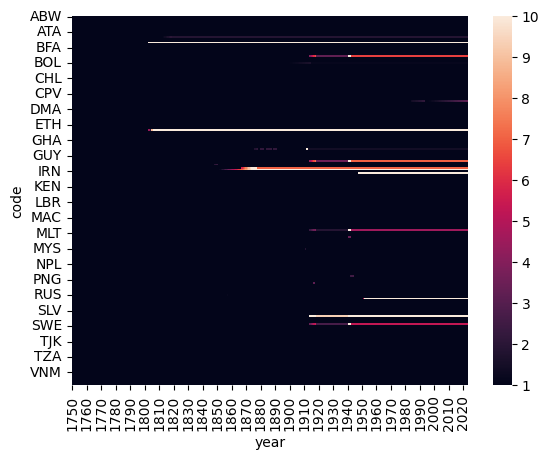

In [17]:
# vérification :
# delta = pd.concat([datasetCountries["rCco2"],datasetCountries["Cco2"]]).drop_duplicates(keep=False)
delta =datasetCountries["rCco2"].subtract(datasetCountries["bCco2"])

sns.heatmap(delta, vmin=1, vmax=10)

In [18]:
delta.loc[["FRA"]]
delta[delta[range(1750, yearEnd+1)]>1].loc[["BEL","FRA"]][range(1800, 1815)].dropna(axis=1, how="all")

year,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814
code,,,,,,,,,,,,
BEL,12.794,19.191,25.588,31.985,38.382,44.779,51.176,57.573,63.970,70.367,76.764,83.161
FRA,4.478,2.239,8.830,11.006,13.182,15.358,17.534,13.118,13.119,13.119,13.119,13.119


In [19]:
# Matrice des erreurs > errormax (après avoir retiré les pays et les années non concernées)
# sélection des delta > errormax
errormax = 5
delta[delta[range(1750, yearEnd+1)]>errormax].dropna(axis=0, how="all").dropna(axis=1, how="all")

year,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
code,,,,,,,,,,,,,,,,,,,,,
BEL,12.794,19.191,25.588,31.985,38.382,44.779,51.176,57.573,63.970,70.367,...,172.728,172.726,172.727,172.727,172.728,172.727,172.728,172.728,172.728,172.727
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.401,6.400,6.400,6.400,6.400,6.399,6.399,6.399,6.399,6.399
FRA,NaN,NaN,8.830,11.006,13.182,15.358,17.534,13.118,13.119,13.119,...,13.116,13.118,13.115,13.118,13.121,13.120,13.118,13.119,13.117,13.117
GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.981,6.981,6.981,6.981,6.982,6.981,6.982,6.982,6.982,6.982
IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.036,7.036,7.034,7.036,7.035,7.036,7.038,7.037,7.035,7.035
IRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.249,22.249,22.249,22.249,22.249,22.249,22.248,22.248,22.248,22.248
IRQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.420,14.421,14.421,14.421,14.421,14.421,14.421,14.421,14.421,14.421
MKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Exemple:
display("Emissions brutes:")
display(datasetCountries["bCco2"].loc[["IND"]][range(1860,1880)])
display("Emissions recalculées:")
display(datasetCountries["rCco2"].loc[["IND"]][range(1860,1880)])

'Emissions brutes:'

year,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879
code,,,,,,,,,,,,,,,,,,,,
IND,1.674,2.171,2.722,3.332,3.908,4.475,5.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.882,8.566


'Emissions recalculées:'

year,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879
code,,,,,,,,,,,,,,,,,,,,
IND,1.673,2.17,2.72,3.33,3.907,4.474,5.114,5.754,6.394,7.034,7.674,8.314,8.954,9.594,10.234,10.874,11.514,12.154,13.921,15.605


In [21]:
datasetCountries.keys()

dict_keys(['pop', 'co2', 'bCco2', 'co2_pc', 'rCco2'])

##### Création d'un nouveau dataframe : émissions cumulées par personne Cco2_pc

In [22]:
def add_cumulated_emissions_pc(data):
    df = data["co2_pc"].copy()
    for year in range(1751, yearEnd+1):
        df[year] = df[year] + df[year-1]
    data["Cco2_pc"]= df
    return data

datasetCountries = add_cumulated_emissions_pc(datasetCountries)
display(datasetCountries["Cco2_pc"])
display(datasetCountries["co2"])

year,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,907.797,916.412,924.823,933.244,941.436,949.168,956.809,964.780,972.492,980.525
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.458,8.744,9.001,9.272,9.561,9.847,10.144,10.401,10.661,10.927
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.660,37.637,38.510,39.290,40.035,40.716,41.210,41.766,42.334,42.899
AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,189.275,199.056,208.763,217.638,226.583,236.456,246.070,255.923,265.678,275.690
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.158,102.784,104.382,106.208,107.899,109.572,111.212,113.014,114.844,116.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.894,32.020,33.190,34.385,35.532,36.824,37.965,39.113,40.281,41.466
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.604,40.056,40.368,40.661,41.001,41.338,41.639,41.932,42.201,42.456
ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,650.208,658.077,666.060,673.694,681.108,688.897,696.064,702.989,709.487,715.845


year,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.872,0.898,0.883,0.890,0.872,0.828,0.821,0.857,0.831,0.867
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.086,9.670,8.906,9.677,10.602,10.825,11.606,10.272,10.558,11.020
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.090,27.507,25.466,23.595,23.305,22.047,16.533,19.196,20.250,20.781
AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.121,0.139,0.139,0.128,0.132,0.147,0.143,0.143,0.139,0.145
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.000,4.712,4.632,5.293,4.895,4.827,4.711,5.134,5.173,5.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202,0.227,0.238,0.245,0.238,0.271,0.242,0.245,0.251,0.257
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.480,14.080,10.007,9.695,11.595,11.837,10.884,10.871,10.296,10.035
ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,471.965,446.349,457.090,439.996,434.581,464.114,434.067,425.918,405.312,401.893


# ============================================================

#### Remise en ordre des clés (feature) :



In [23]:
datasetCountries.keys()

dict_keys(['pop', 'co2', 'bCco2', 'co2_pc', 'rCco2', 'Cco2_pc'])

In [24]:
featList2 = list(datasetCountries.keys())
newfeature_list = featList2[:2] + featList2[-2:-1] + featList2[-3:-2] +featList2[-1:]
newfeature_list


['pop', 'co2', 'rCco2', 'co2_pc', 'Cco2_pc']

In [25]:
datasetCountries = { feat: datasetCountries[feat] for feat in newfeature_list}
datasetCountries.keys()

dict_keys(['pop', 'co2', 'rCco2', 'co2_pc', 'Cco2_pc'])

In [26]:
# test des valeurs :
for y in [1900, 1980, 2022]:
    print("=== année: ", y, " ===")
    for c in ["FRA", "USA", "CHN"]:
        print("   --- pays:", WorldCountries.at[c, "FRusename"], " ---")
        for col in datasetCountries.keys():
            print("      ", data_unit[col]["name"]['fr'], "=", datasetCountries[col][y][c], data_unit[col]["unit"]['fr'])

=== année:  1900  ===
   --- pays: France  ---
       Population = 40019136.0 personnes (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> = 129.277 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions cumulées de CO<sub>2</sub> = 3723.5829999999996 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> par personne = 3.23 tonne de CO<sub>2</sub> par personne (% évolution / année précédente)
       Emissions cumulées de CO<sub>2</sub> par personne = 97.18400000000004 tonne de CO<sub>2</sub> par personne
   --- pays: États-Unis  ---
       Population = 74829905.0 personnes (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> = 662.738 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions cumulées de CO<sub>2</sub> = 10664.449 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> par personne = 8.857 tonne de CO<sub>2</sub> pa

#### Retirer les pays à population < popmin 

In [29]:
dd = datasetCountries["pop"]
littleCountries = list(dd[dd[yearEnd] <= popmin].index)
print(f"Petites pays < {popmin} habitants en {yearEnd} : ", " | ".join(littleCountries))

Petites pays < 200000 habitants en 2023 :  ABW | AIA | AND | ATA | ATG | BES | BMU | COK | CUW | CXR | DMA | FRO | FSM | GRD | GRL | KIR | KNA | LCA | LIE | MHL | MSR | NIU | NRU | PLW | SHN | SPM | SXM | SYC | TCA | TON | TUV | VCT | VGB | WLF


In [30]:
dd.loc["NCL"]

year
1750         0.0
1751         0.0
1752         0.0
1753         0.0
1754         0.0
          ...   
2019    283617.0
2020    284186.0
2021    285226.0
2022    287131.0
2023    289880.0
Name: NCL, Length: 274, dtype: float64

##### Aplatir le dictionnaire de dataframes en JSON et tri les colonnes (ordre des pays pour chaque année, pour la bar race) 

In [31]:
ordered_dataset_brut = {}

def get_value(element):
#     return element["value"]
    return list(element.values())[0]

errorCountries = list()
def dataListPerCountry(col,y):
    l = list()
    for c in WorldCountries.index:
        try:
            l.append({c:datasetCountries[col][y][c].item()})
        except KeyError:
            errorCountries.append(c)
    return l
            
            


ordered_dataset_brut = { 
    col:{
        y:sorted(
#             [{"country":c, "value":datasetCountries[col][y][c]} for c in countries_list ], 
            dataListPerCountry(col, y),           
#             [{c:datasetCountries[col][y][c]} for c in WorldCountries.index ], 
            key=get_value,
            reverse=True
        )        
        for y in range(1750,yearEnd+1)
    } 
    for col in datasetCountries.keys() if col!="bCco2" } #on retire bCco2 du dataset final

print("pays de WorldCountries ne figurant pas dans le dataset owid :")
print(", ".join(sorted(list(set(errorCountries)))))
ordered_dataset_brut.keys()


pays de WorldCountries ne figurant pas dans le dataset owid :
ALA, ANT, ASM, ESH, FLK, GGY, GLP, GUF, IMN, JEY, MAF, MTQ, MYT, PRI, REU, SJM, VIR


dict_keys(['pop', 'co2', 'rCco2', 'co2_pc', 'Cco2_pc'])

#####  Tronquer le classement de chaque année aux N premiers, pour alléger le fichier/

In [32]:
# on retire les valeurs extrêmes : SXM, CUW, NCL
# excluded_countries = ["SXM", "CUW", "NCL", "FRO", "PLW", "SPM"]
excluded_countries = littleCountries
ordered_dataset = { 
    col:{
        y: [ v for v in ordered_dataset_brut[col][y] if list(v.keys())[0] not in excluded_countries]
              
        for y in range(1750,yearEnd+1)
    } 
    for col in ordered_dataset_brut.keys()  }

In [34]:
truncated_dataset_brut = {
    col:{
        y:[
            d for d in ordered_dataset_brut[col][y][:N] if list(d.values())[0]!=0
        ] for y in ordered_dataset_brut[col].keys()
    } for col in ordered_dataset_brut.keys()
}

truncated_dataset = {
    col:{
        y:[
            d for d in ordered_dataset[col][y][:N] if list(d.values())[0]!=0
        ] for y in ordered_dataset[col].keys()
    } for col in ordered_dataset.keys()
}
truncated_dataset_brut["co2"]

{1750: [{'GBR': 9.306}],
 1751: [{'GBR': 9.407}],
 1752: [{'GBR': 9.505}],
 1753: [{'GBR': 9.61}],
 1754: [{'GBR': 9.734}],
 1755: [{'GBR': 9.793}],
 1756: [{'GBR': 9.91}],
 1757: [{'GBR': 10.094}],
 1758: [{'GBR': 10.216}],
 1759: [{'GBR': 10.339}],
 1760: [{'GBR': 10.514}],
 1761: [{'GBR': 10.748}],
 1762: [{'GBR': 10.952}],
 1763: [{'GBR': 11.192}],
 1764: [{'GBR': 11.397}],
 1765: [{'GBR': 11.643}],
 1766: [{'GBR': 11.876}],
 1767: [{'GBR': 12.153}],
 1768: [{'GBR': 12.467}],
 1769: [{'GBR': 12.78}],
 1770: [{'GBR': 13.097}],
 1771: [{'GBR': 13.369}],
 1772: [{'GBR': 13.624}],
 1773: [{'GBR': 13.808}],
 1774: [{'GBR': 14.012}],
 1775: [{'GBR': 14.339}],
 1776: [{'GBR': 14.654}],
 1777: [{'GBR': 14.96}],
 1778: [{'GBR': 15.243}],
 1779: [{'GBR': 15.535}],
 1780: [{'GBR': 15.879}],
 1781: [{'GBR': 16.234}],
 1782: [{'GBR': 16.581}],
 1783: [{'GBR': 17.063}],
 1784: [{'GBR': 17.471}],
 1785: [{'GBR': 17.961}, {'CAN': 0.004}],
 1786: [{'GBR': 18.444}, {'CAN': 0.004}],
 1787: [{'GBR': 1

In [35]:
# tronquer countryId aux pays concernés, c'à-d dans chque top 10 (si N=10) pour gagner de la place mémoire :
# permet de passer à 66 pays concernés au lieu de 232 dont on aurait chargé inutilement les drapeaux
cc_brut = [list(f.keys())[0] 
      for d in truncated_dataset_brut.values() 
      for e in d.values() 
      for f in e]
cc = [list(f.keys())[0] 
      for d in truncated_dataset.values() # liste des pays sans les valeurs extrêmes de SXM et CUW
      for e in d.values() 
      for f in e]
concerned_countries_brut = pd.DataFrame({"code":cc_brut})["code"].unique()
concerned_countries = pd.DataFrame({"code":cc})["code"].unique()
concerned_countries_all = pd.DataFrame({"code":cc+cc_brut})["code"].unique()

print(f"Nombre de pays concernés dans le top {N} (brut): {len(concerned_countries_brut)} :")
print(", ".join(concerned_countries_brut))
print(f"Nombre de pays concernés dans le top {N} après retrait des valeurs extrêmes : {len(concerned_countries)}")
print() 
print(f"Pays retirés (valeurs trop extrêmes) du top {N} :", ", ".join([c for c in concerned_countries_brut if c not in concerned_countries]))
print(f"Pays qui entrent dans le top {N} en remplacement des pays retirés :", ", ".join([c for c in concerned_countries if c not in concerned_countries_brut]))
print()
print(f"Nombre de pays concernés dans le top {N} au total: {len(concerned_countries_all)}")

Nombre de pays concernés dans le top 20 (brut): 95 :
BGD, GBR, AFG, ETH, GHA, NLD, KHM, GIN, CIV, TWN, PNG, BOL, TUN, NOR, GTM, ZWE, MRT, AUS, NZL, JAM, HTI, CAN, DEU, POL, USA, SLE, FRA, BEL, AUT, RUS, ESP, UKR, HUN, BLR, KAZ, UZB, SWE, CHN, IND, JPN, ITA, IDN, PAK, NGA, TUR, KOR, COD, ROU, MEX, BRA, VNM, EGY, PHL, THA, IRN, DNK, CHL, IRL, CUB, CZE, CHE, SVK, ZAF, SAU, VEN, ARG, EST, TKM, URY, TTO, BHR, BRN, ISL, IRQ, KWT, QAT, SXM, CUW, LUX, BES, ABW, NCL, SPM, GRL, BHS, ATG, LBY, ARE, PLW, NRU, SGP, FRO, FIN, OMN, MNG
Nombre de pays concernés dans le top 20 après retrait des valeurs extrêmes : 85

Pays retirés (valeurs trop extrêmes) du top 20 : SXM, CUW, BES, ABW, SPM, GRL, ATG, PLW, NRU, FRO
Pays qui entrent dans le top 20 en remplacement des pays retirés : 

Nombre de pays concernés dans le top 20 au total: 95


##### Correspondance code alpha3 / nom pays / continent / flag et couleurs par continent :

In [36]:
WorldContinents = WorldCountries[
    ["ENcontinent", "FRcontinent", "continentCode", "continentColor"]
].set_index("continentCode").drop_duplicates()

continentId = {c:{
    "name": {
        "en": WorldContinents.at[c, "ENcontinent"],
        "fr": WorldContinents.at[c, "FRcontinent"],
    },
    "color": WorldContinents.at[c, "continentColor"]
} for c in WorldContinents.index }


countryId_all = {c: {
    "name": {
        "en": WorldCountries.at[c, "ENusename"],
        "fr": WorldCountries.at[c, "FRusename"],
    },
    "code": WorldCountries.at[c, "continentCode"],
    "flag": WorldCountries.at[c, "svgFlag"],
} for c in concerned_countries_all}

countryId = {c: {
    "name": {
        "en": WorldCountries.at[c, "ENusename"],
        "fr": WorldCountries.at[c, "FRusename"],
    },
    "code": WorldCountries.at[c, "continentCode"],
    "flag": WorldCountries.at[c, "svgFlag"],
} for c in concerned_countries}



print(f"Nombre de pays concernés dans le top {N} : {len(countryId.keys())}")
print(continentId)

Nombre de pays concernés dans le top 20 : 85
{'ASI': {'name': {'en': 'Asia', 'fr': 'Asie'}, 'color': 'rgb( 239, 154, 154 )'}, 'EUR': {'name': {'en': 'Europe', 'fr': 'Europe'}, 'color': 'rgb( 255, 183, 77)'}, 'AFR': {'name': {'en': 'Africa', 'fr': 'Afrique'}, 'color': 'rgb(  128, 203, 196  )'}, 'OCE': {'name': {'en': 'Oceania', 'fr': 'Océanie'}, 'color': 'rgb( 206, 147, 216 )'}, 'NAM': {'name': {'en': 'North America', 'fr': 'Amérique du Nord'}, 'color': 'rgb( 144, 202, 249 )'}, 'ANT': {'name': {'en': 'Antarctica', 'fr': 'Antarctique'}, 'color': 'rgb(255,255,255)'}, 'SAM': {'name': {'en': 'South America', 'fr': 'Amérique du Sud'}, 'color': 'rgb( 197, 225, 165 )'}}


In [37]:
WorldContinents



,ENcontinent,FRcontinent,continentColor
continentCode,,,
ASI,Asia,Asie,"rgb( 239, 154, 154 )"
EUR,Europe,Europe,"rgb( 255, 183, 77)"
AFR,Africa,Afrique,"rgb( 128, 203, 196 )"
OCE,Oceania,Océanie,"rgb( 206, 147, 216 )"
NAM,North America,Amérique du Nord,"rgb( 144, 202, 249 )"
ANT,Antarctica,Antarctique,"rgb(255,255,255)"
SAM,South America,Amérique du Sud,"rgb( 197, 225, 165 )"


##### Analyse des pays concernés : incohérences ou pays trop petits

In [38]:
# for c in concerned_countries:

popmax=datasetCountries["pop"][datasetCountries["pop"].index.isin(concerned_countries_all)].max(axis=1).sort_values(ascending=[False])
co2_pcmax=(datasetCountries["co2_pc"][datasetCountries["co2_pc"].index.isin(concerned_countries_all)].max(axis=1))
Cco2_pcmax=(datasetCountries["Cco2_pc"][datasetCountries["Cco2_pc"].index.isin(concerned_countries_all)].max(axis=1))

print(f'{"     pays" : <32} {"pop max" :<10} {"co2_pc max" :<10} {"Cco2_pc max" :<10}')
print('_'*80)
for c in popmax.index:
#     print (c, countryId[c][1], popmax[c], co2_pcmax[c], Cco2_pcmax[c])
    print(f'{c : <4} {countryId_all[c]["name"]["fr"]:.<27} {popmax[c] :10.0f} {co2_pcmax[c] :10.2f} {Cco2_pcmax[c] :10.0f}')



     pays                        pop max    co2_pc max Cco2_pc max
________________________________________________________________________________
IND  Inde....................... 1438069597       2.13         63
CHN  Chine...................... 1426437276       8.37        218
USA  États-Unis.................  343477332      22.26       2279
IDN  Indonésie..................  281190068       2.64         83
PAK  Pakistan...................  247504504       1.03         39
NGA  Nigeria....................  227882949       1.01         40
BRA  Brésil.....................  211140731       2.79        122
BGD  Bangladesh.................  171466986       0.67         14
RUS  Russie.....................  149448434      17.02        900
MEX  Mexique....................  129739764       6.22        313
ETH  Éthiopie...................  128691696       0.15          4
JPN  Japon......................  128192471      10.30        600
PHL  Philippines................  114891200       1.34      

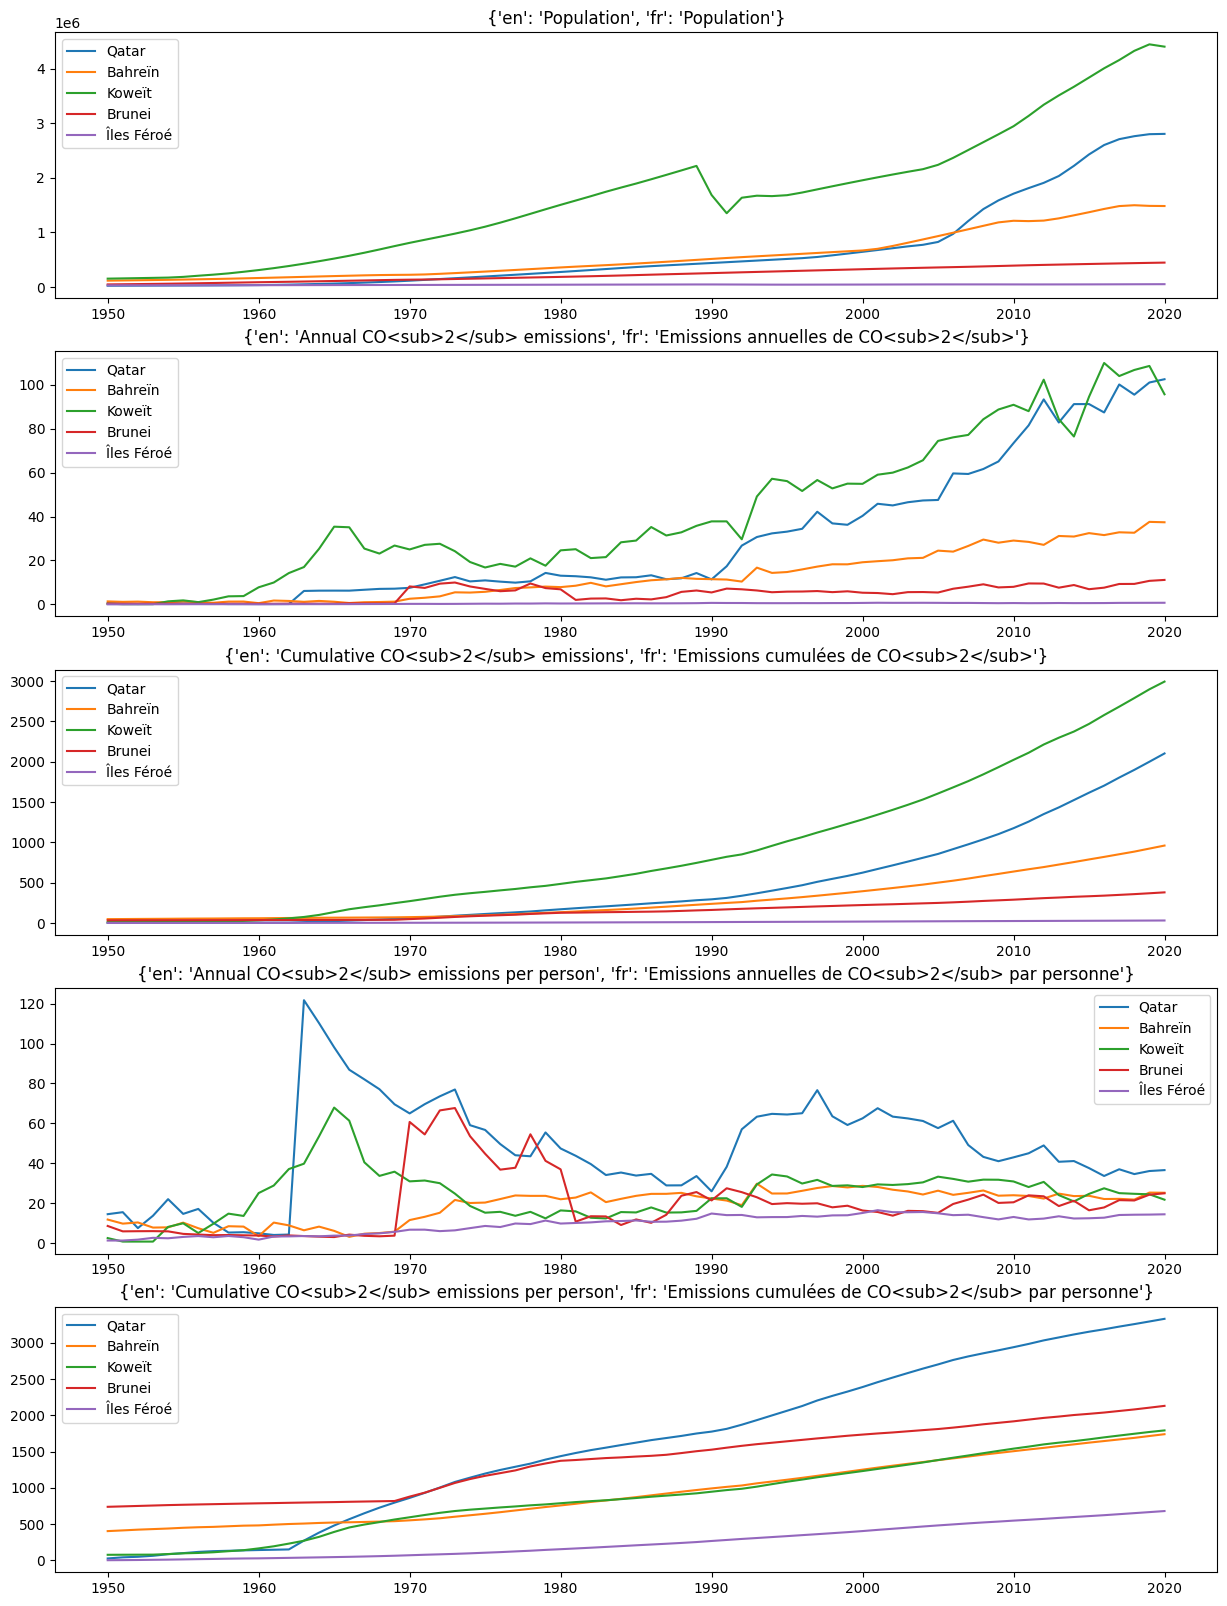

In [39]:
# Exemples de tendance (pour vérification de la cohérence) :
# countryList = ["SXM", "CUW", "NCL", "BRN", "QAT", "KWT"]
# countryList = ["USA", "AUS", "MNG"]
countryList = ["QAT", "BHR", "KWT", "BRN", "FRO" ]
featList = ["pop", "co2", "rCco2", "co2_pc", "Cco2_pc"]
plt.figure(figsize=(15,20))

for i, feat in enumerate(featList):

    plt.subplot(len(featList),1,i+1)
    for c in countryList:
        d = datasetCountries[feat].loc[c]

        plt.plot(d[d.index.isin(range(1950,2021))], label=countryId_all[c]["name"]["fr"])
    plt.legend()
    plt.title(data_unit[feat]["name"])


Dataset continents

In [40]:
continentId.update({'WLD': {'name': {'en': 'World', 'fr': 'Monde'},
  'color': 'rgb( 180, 180, 180 )'}})
continentId.pop("ANT", None)
continentId

{'ASI': {'name': {'en': 'Asia', 'fr': 'Asie'},
  'color': 'rgb( 239, 154, 154 )'},
 'EUR': {'name': {'en': 'Europe', 'fr': 'Europe'},
  'color': 'rgb( 255, 183, 77)'},
 'AFR': {'name': {'en': 'Africa', 'fr': 'Afrique'},
  'color': 'rgb(  128, 203, 196  )'},
 'OCE': {'name': {'en': 'Oceania', 'fr': 'Océanie'},
  'color': 'rgb( 206, 147, 216 )'},
 'NAM': {'name': {'en': 'North America', 'fr': 'Amérique du Nord'},
  'color': 'rgb( 144, 202, 249 )'},
 'SAM': {'name': {'en': 'South America', 'fr': 'Amérique du Sud'},
  'color': 'rgb( 197, 225, 165 )'},
 'WLD': {'name': {'en': 'World', 'fr': 'Monde'},
  'color': 'rgb( 180, 180, 180 )'}}

In [41]:
# dictionnaire de correspondance "nom_continent" : "iso_code"
continentCodes = { continentId[c]['name']['en']:c for c in continentId.keys() }

# sélection des continents dans le dataSource :
dataContinents = dataSource[dataSource['country'].isin(continentCodes.keys())]

#  remplacement de la colonne iso_code 'NaN' par les iso_codes :
new_iso_codes = dataContinents["country"].map(lambda x: continentCodes[x])
dataContinents = dataContinents.assign(iso_code=new_iso_codes)


dataContinents

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
274,Africa,1750,AFR,8.034972e+07,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Africa,1751,AFR,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Africa,1752,AFR,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Africa,1753,AFR,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Africa,1754,AFR,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49564,World,2019,WLD,7.811294e+09,1.221494e+14,1623.120,0.208,37104.273,373.850,1.018,...,100.0,100.0,0.401,1.090,1.571,0.080,52796.523,43147.367,0.004,0.0
49565,World,2020,WLD,7.887001e+09,1.185900e+14,1638.271,0.208,35126.527,-1977.750,-5.330,...,100.0,100.0,0.406,1.107,1.595,0.081,50792.543,41394.840,0.000,0.0
49566,World,2021,WLD,7.954448e+09,1.260048e+14,1696.308,0.213,36991.734,1865.208,5.310,...,100.0,100.0,0.411,1.125,1.619,0.083,52938.793,43391.352,0.004,0.0
49567,World,2022,WLD,8.021407e+09,1.301126e+14,1601.124,0.200,37293.836,302.100,0.817,...,100.0,100.0,0.417,1.143,1.644,0.084,53327.215,43746.762,0.004,0.0


In [42]:
# création du dictionnaire (comme pour les pays)
datasetContinents = transform(dataContinents)
datasetContinents

pop
co2
bCco2
co2_pc


{'pop': year         1750  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
 code                                                                     ...   
 AFR    80349715.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 ASI   498937067.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 EUR   156132376.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 NAM    11553800.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 OCE     2061305.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 SAM     7012585.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 WLD   753279296.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
 
 year          2014          2015          2016          2017          2018  \
 code                                                                         
 AFR   1.189221e+09  1.220076e+09  1.251209e+09  1.282902e+09  1.315410e+09   
 ASI   4.435745e+09  4.48

In [43]:
datasetContinents['pop'].loc['AFR', 2014]

np.float64(1189220573.0)

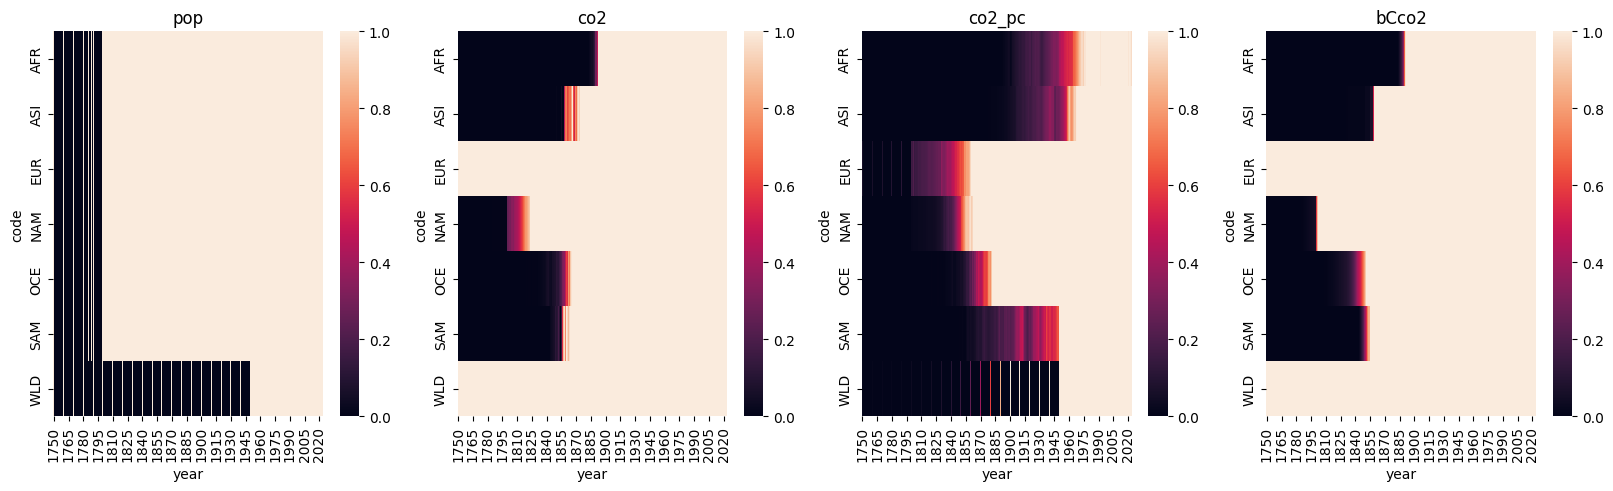

In [44]:
# Visualisation des données et des trous :
featList = ["pop", "co2", "co2_pc", "bCco2"]
fig, axs = plt.subplots(ncols=4,nrows=1,figsize=(20,5))
for i,feat in enumerate(featList):
    sns.heatmap(datasetContinents[feat], vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(feat)

/tmp/ipykernel_3758/333950000.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()
/tmp/ipykernel_3758/333950000.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()
/tmp/ipykernel_3758/333950000.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).ffill()
/tmp/ipykernel_3758/333950000.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  d.loc[j] = d.loc[j].replace(0).

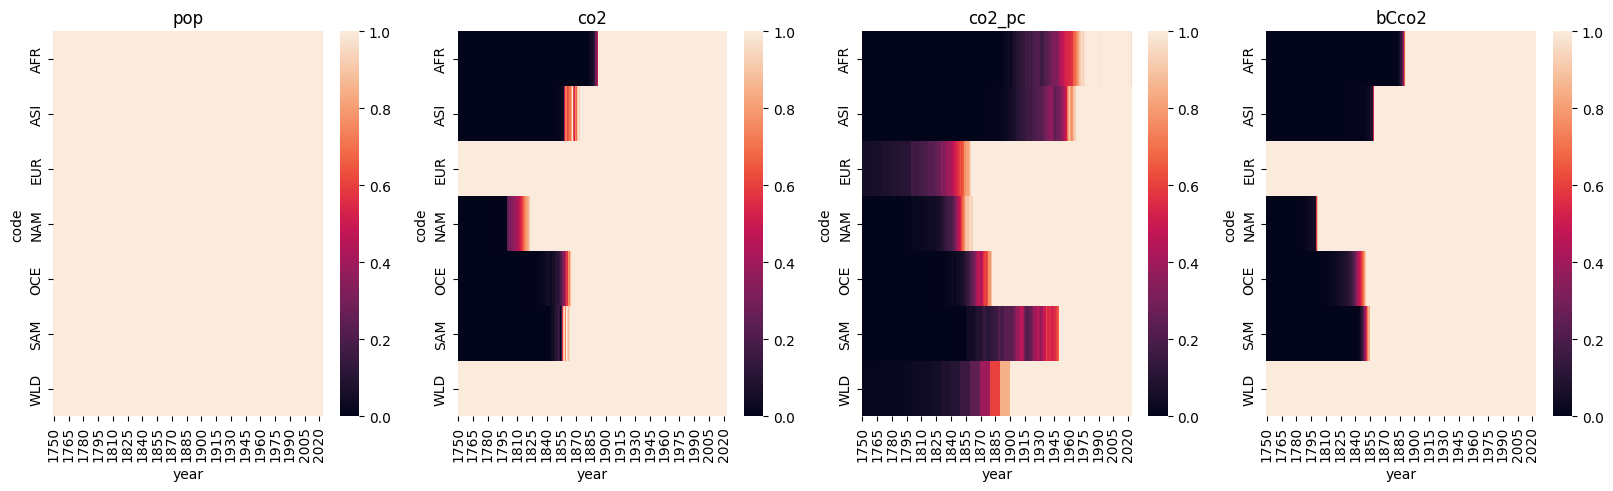

In [45]:
# bouchage des trous : les valeurs nulles sont remplacées par la valeur précédente non nulle.
fig, axs = plt.subplots(ncols=4,nrows=1,figsize=(20,5))
for i,feat in enumerate(featList):

    d = datasetContinents[feat]
    for j in d.index:
        d.loc[j] = d.loc[j].replace(0).ffill()
    sns.heatmap(datasetContinents[feat], vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(feat)

<Axes: xlabel='year', ylabel='code'>

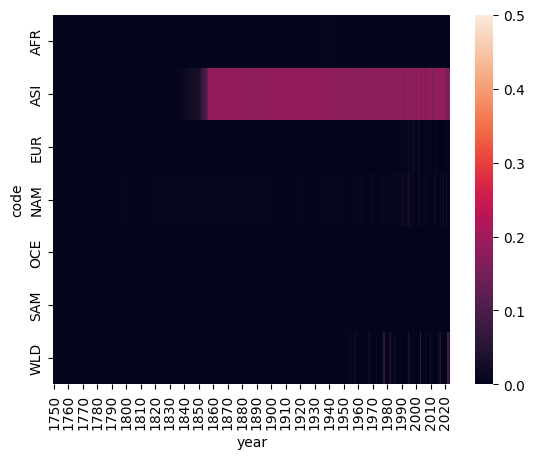

In [46]:
# vérification en recalculant les émissions cumulées :
datasetContinents = add_cumulated_emissions(datasetContinents)

# vérification :
delta =datasetContinents["rCco2"].subtract(datasetContinents["bCco2"])

sns.heatmap(delta, vmin=0, vmax=0.5)

In [47]:
# Création des émissions cumulées par personne :
datasetContinents = add_cumulated_emissions_pc(datasetContinents)
display(datasetContinents["Cco2_pc"])

year,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
code,,,,,,,,,,,,,,,,,,,,,
AFR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,69.406,70.500,71.600,72.687,73.742,74.841,75.824,76.845,77.836,78.795
ASI,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,131.175,135.425,139.664,143.982,148.391,152.882,157.285,161.873,166.469,171.200
EUR,0.061,0.122,0.183,0.244,0.305,0.366,0.427,0.488,0.549,0.61,...,828.842,836.380,843.881,851.412,858.907,866.152,872.850,879.926,886.917,893.605
NAM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,1578.143,1589.767,1601.039,1612.118,1623.401,1634.405,1644.214,1654.593,1665.036,1675.164
OCE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,843.105,854.311,865.524,876.650,887.663,898.533,908.795,918.720,928.388,937.887
SAM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,151.443,154.363,157.137,159.848,162.413,164.976,167.276,169.799,172.347,174.910
WLD,0.012,0.024,0.036,0.048,0.060,0.072,0.084,0.096,0.108,0.12,...,367.602,372.341,377.027,381.734,386.486,391.236,395.690,400.340,404.989,409.659


In [48]:
# test des valeurs :
for y in [1900, 1980, 2022]:
    print("=== année: ", y, " ===")
    for c in continentCodes.keys():
        print("   --- continent:", c, " ---")
        for col in datasetContinents.keys():
            print("      ", data_unit[col]["name"]['fr'], "=", datasetContinents[col][y][continentCodes[c]], data_unit[col]["unit"]['fr'])

=== année:  1900  ===
   --- continent: Asia  ---
       Population = 931021418.0 personnes (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> = 44.005 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions cumulées brutes de CO<sub>2</sub> = 419.833 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> par personne = 0.047 tonne de CO<sub>2</sub> par personne (% évolution / année précédente)
       Emissions cumulées de CO<sub>2</sub> = 420.015 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions cumulées de CO<sub>2</sub> par personne = 0.4709999999999999 tonne de CO<sub>2</sub> par personne
   --- continent: Europe  ---
       Population = 407376724.0 personnes (% du total mondial)
       Emissions annuelles de CO<sub>2</sub> = 1205.734 million de tonnes de CO<sub>2</sub> (% du total mondial)
       Emissions cumulées brutes de CO<sub>2</sub> = 33266.676 million de tonnes de CO<sub

In [49]:
# aplatir et ordonner le dictionnaire :
ordered_dataset_cont = {}
def get_value(element):
    return list(element.values())[0]
ordered_dataset_cont = { 
    col:{
        y:sorted(
            [{ c : datasetContinents[col].loc[c, y].item() } for c in continentId.keys()],
            key=get_value,
            reverse=True
        )        
        for y in range(1750,yearEnd+1)
    } 
    for col in datasetContinents.keys() if col!="bCco2" } #on retire bCco2 du dataset final

ordered_dataset_cont.keys()

dict_keys(['pop', 'co2', 'co2_pc', 'rCco2', 'Cco2_pc'])

In [50]:
ordered_dataset_cont

{'pop': {1750: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM': 11553800.0},
   {'SAM': 7012585.0},
   {'OCE': 2061305.0}],
  1751: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM': 11553800.0},
   {'SAM': 7012585.0},
   {'OCE': 2061305.0}],
  1752: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM': 11553800.0},
   {'SAM': 7012585.0},
   {'OCE': 2061305.0}],
  1753: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM': 11553800.0},
   {'SAM': 7012585.0},
   {'OCE': 2061305.0}],
  1754: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM': 11553800.0},
   {'SAM': 7012585.0},
   {'OCE': 2061305.0}],
  1755: [{'WLD': 753279296.0},
   {'ASI': 498937067.0},
   {'EUR': 156132376.0},
   {'AFR': 80349715.0},
   {'NAM

### Dernière étape : export / création du fichier dataset.js

In [51]:
with open(dataset_path, 'w') as f:
    f.write("\n".join([
        f'const countryId = {countryId}',
        "",
        f'const continentId = {continentId}',
        "", 
#         f'const dataSet = {ordered_dataset}',         # ordonné               
        f'const dataSet = {truncated_dataset}',         # ordonné tronqué       ~ 612 kB

        "",
        f'const dataSetContinents = {ordered_dataset_cont}',     
        "",
        f'const dataSetUnits = {data_unit}',
        "",
        f'const N = {N}',
        "",
        f'const graphLegend = {graph_legend}',
        "",
        f'const owidCitation = {owid_citation}',
        "",
        f'const underlyingCitation = {underlying_citation}'
    ]))

###      --- Fin du script ---